# 위키독스 Python 교제 내용

https://wikidocs.net/28

### 클래스는 왜 필요한가?


In [2]:
result = 0

def add(num):
    global result
    result += num
    return result

print(add(3))
print(add(4))

3
7


* 이전에 계산한 결괏값을 유지하기 위해서 result 전역 변수(global)를 사용했다. 
* 만일 한 프로그램에서 2개의 계산기가 필요한 상황이 발생하면 어떻게 해야할까 ? -> class 사용 , 각각 함수 새로 제작


In [3]:
result1 = 0
result2 = 0

def add1(num):
    global result1
    result1 += num
    return result1

def add2(num):
    global result2
    result2 += num
    return result2

print(add1(3))
print(add1(4))
print(add2(3))
print(add2(7))

3
7
3
10


#### 이러한 방식으로 함수를 새로 제작하는 것은 규모가 커질수록 비효율 적이다.

In [1]:
class Calculator:
    def __init__(self):
        self.result = 0

    def add(self, num):
        self.result += num
        return self.result

cal1 = Calculator()
cal2 = Calculator()

print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))

3
7
3
10


* Calculator 클래서로 만든 별개의 계산기 cal1, cal2(python에서는 이것을 객체라고 부른다)가 각각의 역할을 수행한다. 그리고 계산기(cal1, cal2)의 결괏값 역시 다른 계산기의 결과값과 상관없이 독립적인 값을 유지한다. 클래스를 사용하면 개ㅖ산기 대수가 늘어나더라도 객체를 생성만 하면 되기 때문에 함수를 사용하는 경우와 달리 매우 간단해진다. 

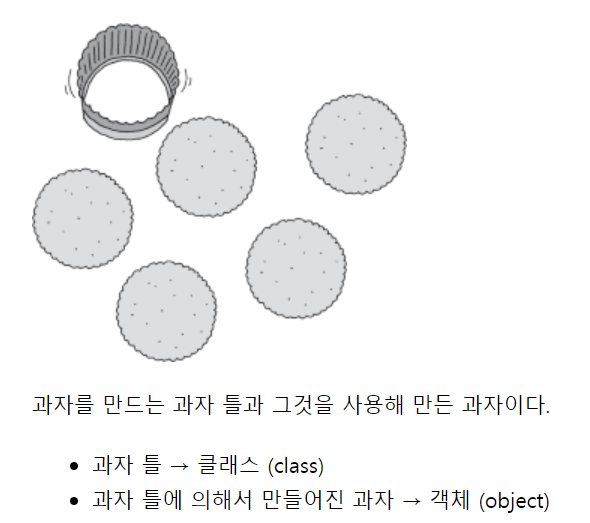

In [4]:
from IPython.display import Image
Image(r"C:\Users\is041\OneDrive\사진\스크린샷\캡처.PNG") # code안에서 나오게 할 때

* 클래스로 만든 객체에는 중요한 특징이 있다. 바로 객체마다 고유한 성격을 가진다는 것이다. 동일한 클래스로 만든 객체들은 서로 전혀 영향을 주지 않는다.

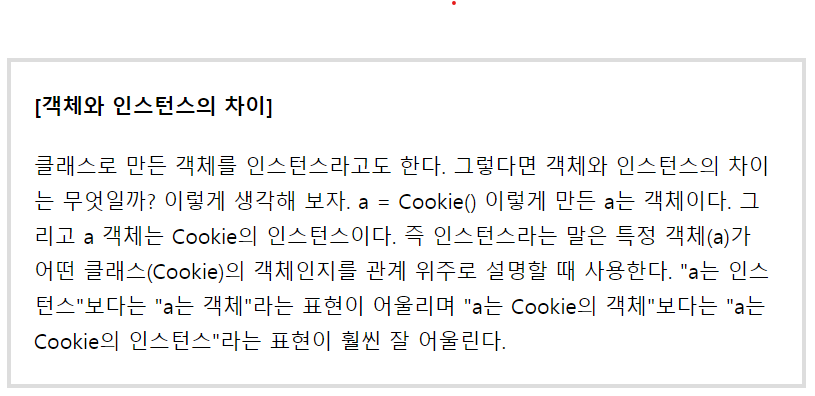

In [5]:
Image(r"C:\Users\is041\OneDrive\사진\스크린샷\화면 캡처 2021-07-13 134139.png")

## 클래스 계산기 만들기

 * tip. pass는 아무것도 수행하지 않는 문법으로 임시로 코드를 작성할 때 주로 사용한다.

In [6]:
class FourCal:
    pass

a = FourCal()
type(a)


__main__.FourCal

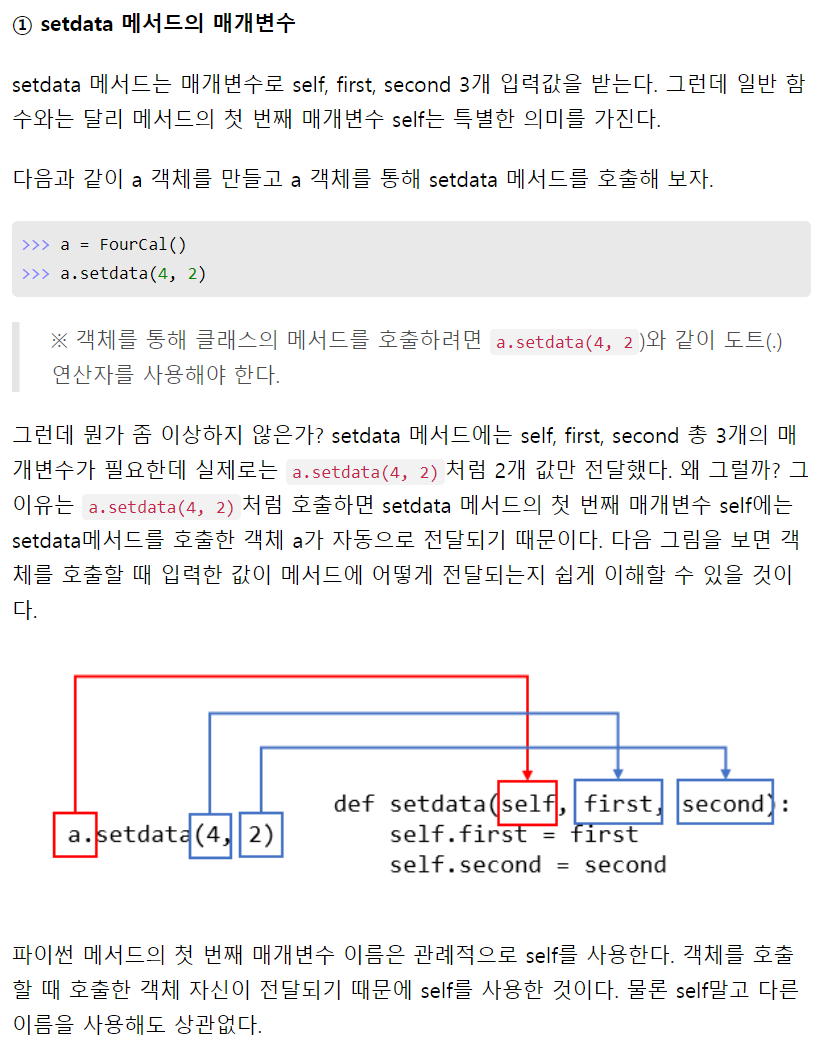

In [7]:
Image(r"C:\Users\is041\OneDrive\사진\스크린샷\화면 캡처 2021-07-13 134927.png")

In [9]:
class FourCal:
    def setdata(self, first, second):
        self.first = first
        self.second = second
        

In [15]:
a = FourCal()
a.setdata(4,2)

print(a.first)

4


In [18]:
b = FourCal()
b.setdata(3,7)

print(b.first)

3


* 클래스 안에 구현된 함수는 메서드(Method)라고 부른다.
* 클래스로 만든 객체의 객체변수는 다른 객체의 객체변수에 상관없이 독립적인 값을 유지한다.

In [20]:
id(a.first)    # a의 first 주소값을 확인

140709297137552

In [21]:
id(b.first)    # b의 first 주소값을 확인

140709297137520

In [25]:
class FourCal:
    def setdata(self, first, second):
        self.first = first
        self.second = second
    
    def add(self):
        result = self.first + self.second
        return result
    
    def mul(self):
        result = self.first * self.second
        return result
    
    def sub(self):
        result = self.first - self.second
        return result
    
    def div(self):
        result = self.first / self.second
        return result

In [26]:
a = FourCal()
a.setdata(4,2)

print(a.add())

6


## 생성자 (Constructor)

In [27]:
a = FourCal()
a.add()

AttributeError: 'FourCal' object has no attribute 'first'

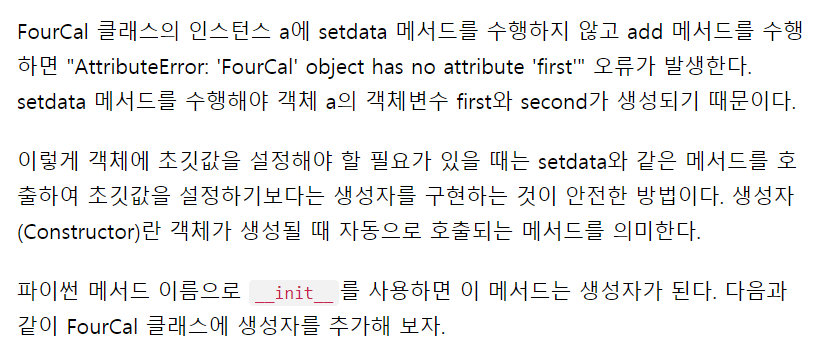

In [28]:
Image(r"C:\Users\is041\OneDrive\사진\스크린샷\화면 캡처 2021-07-13 143658.png")

In [29]:
class FourCal:
    def __init__(self, first, second):
        self.first = first
        self.second = second
    
    def add(self):
        result = self.first + self.second
        return result
    
    def mul(self):
        result = self.first * self.second
        return result
    
    def sub(self):
        result = self.first - self.second
        return result
    
    def div(self):
        result = self.first / self.second
        return result

In [30]:
a = FourCal()

TypeError: __init__() missing 2 required positional arguments: 'first' and 'second'

In [31]:
b = FourCal(4,2)

In [32]:
print(b.first)

4


In [33]:
b.add()

6

## 클래스의 상속

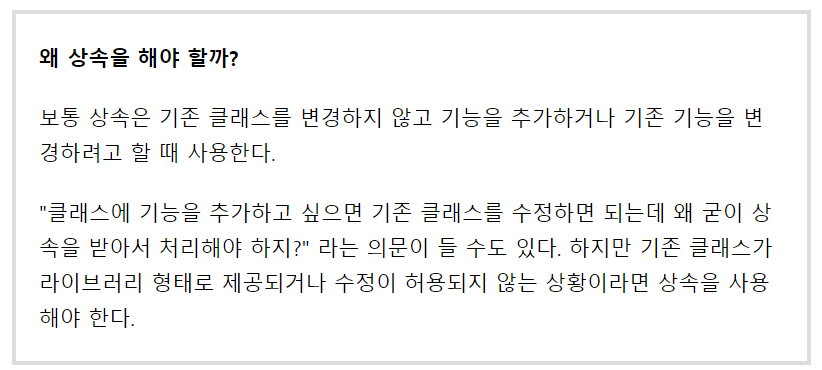

In [34]:
Image(r"C:\Users\is041\OneDrive\사진\스크린샷\화면 캡처 2021-07-13 144134.png")

In [35]:
class MoreFourCal(FourCal):
    def pow(self):
        result = self.first**self.second
        return result

In [36]:
a = MoreFourCal(4,2)
a.pow()

16

## 메서드 오버라이딩

In [37]:
a = FourCal(4,0)
a.div()

ZeroDivisionError: division by zero

In [38]:
class SafeFourCal(FourCal):
    def div(self):
        if self.second == 0:
            return 0
        else:
            return self.first / self.second

* SafeFourCal 클래스는 FourCal  클래스에 있는 DIV 메서드를 동일한 이름으로 다시 작성하였다. 이렇게 부모 클래스( 상속한 클래스) 에 있는 메서드를 동일한 이름으로 다시 만드는 것을 메서드 오버라이딩 이라고 한다. 이렇게 메서드를 오버라이딩 하면 부모클래스의 메서드 대신 오버라이딩한 메서드가 호출된다.

In [39]:
a = SafeFourCal(4,0)
a.div()

0

## 클래스 변수
* 객체변수는 다른 객체들에 영향받지 않고 독립적으로 그 값을 유지한다는 점을 이미 알아보았다. 이번에는 객체변수와는 성격이 다른 클래스 변수에 대해 알아보자.

In [40]:
class Family:
    lastname = "김"

* Family 클래스에 선언한 lastname이 바로 클래스 변수이다. 클래스 변수는 클래스 안에 함수를 선언하는 것과 마찬가지로 클래스 안에 변수를 선언하여 생성한다.

In [41]:
print(Family.lastname)

김


* 클래스 변수는 위 예와 같이 "클래스이름.클래스 변수" 로 사용할 수 있다.

In [42]:
a = Family()
b = Family()
print(a.lastname)
print(b.lastname)

김
김


In [43]:
Family.lastname = "박"

In [44]:
print(a.lastname)
print(b.lastname)

박
박


In [47]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

id(Family.lastname)
id(a.lastname)
id(b.lastname)

2008150150560

2008150150560

2008150150560

* 클래스 변수 값을 변경했더니 클래스로 만든 객체의 lastname 값도 모두 변경된다는 것을 확인할 수 있다. 즉, 클래스 변수는 클래스로 만든 모든 객체에 공유된다는 특징이 있다.

--------------------

# 파이썬 클래스
## OOP(객체 지향 프로그래밍), Self, 인스턴스 메소드, 인스턴스 변수

* 클래스 and 인스턴스 차이 이해
* 네임스페이스 : 객체를 인스턴스화 할 때 저장된 공간
* 클래스 변수 : 직접 접근 가능, 공유
* 인스턴스 변수 : 객체마다 별도 존재

In [1]:
# 예제1
class Dog: # object 상속
    # 클래스 속성
    species = 'firstdog'
    
    # 초기화/인스턴스 속성
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
# 클래스 정보
print(Dog)

# 인스턴스화
a = Dog("mikky", 2)
b = Dog("baby", 3)

# 비교
print(a == b, id(a), id(b))

# 네임스페이스
print('dog1', a.__dict__)
print('dog2', b.__dict__)    
    
# 인스턴스 속성 확인
print('{} is {} and {} is {}'.format(a.name, a.age, b.name, b.age))

if a.species == 'firstdog':
    print('{0} is a {1}'.format(a.name, a.species))

print(Dog.species)
print(a.species)
print(b.species)

<class '__main__.Dog'>
False 2254138975808 2254138976096
dog1 {'name': 'mikky', 'age': 2}
dog2 {'name': 'baby', 'age': 3}
mikky is 2 and baby is 3
mikky is a firstdog
firstdog
firstdog
firstdog


In [2]:
# 예제2
# self의 이해
class SelfTest:
    def func1():
        print('Func1 called')
    def func2(self):
        print(id(self))
        print('Func2 called')


f = SelfTest()

# print(dir(f))
print(id(f))
# f.func1() # 예외
f.func2()
SelfTest.func1()
# SelfTest.func2() # 예외
SelfTest.func2(f)

2254138797456
2254138797456
Func2 called
Func1 called
2254138797456
Func2 called


In [3]:
# 예제3
# 클래스 변수, 인스턴스 변수
class Warehouse:
    # 클래스 변수 
    stock_num = 0 # 재고
    
    def __init__(self, name):
        # 인스턴스 변수
        self.name = name
        Warehouse.stock_num += 1
    
    def __del__(self):
        Warehouse.stock_num -= 1

user1 = Warehouse('Lee')
user2 = Warehouse('Cho')

print(Warehouse.stock_num)
# Warehouse.stock_num = 0.0094
print(user1.name)
print(user2.name)
print(user1.__dict__)
print(user2.__dict__)
print('before', Warehouse.__dict__)
print('>>>', user1.stock_num)

del user1
print('after', Warehouse.__dict__)

2
Lee
Cho
{'name': 'Lee'}
{'name': 'Cho'}
before {'__module__': '__main__', 'stock_num': 2, '__init__': <function Warehouse.__init__ at 0x0000020CD526D790>, '__del__': <function Warehouse.__del__ at 0x0000020CD526D820>, '__dict__': <attribute '__dict__' of 'Warehouse' objects>, '__weakref__': <attribute '__weakref__' of 'Warehouse' objects>, '__doc__': None}
>>> 2
after {'__module__': '__main__', 'stock_num': 1, '__init__': <function Warehouse.__init__ at 0x0000020CD526D790>, '__del__': <function Warehouse.__del__ at 0x0000020CD526D820>, '__dict__': <attribute '__dict__' of 'Warehouse' objects>, '__weakref__': <attribute '__weakref__' of 'Warehouse' objects>, '__doc__': None}


In [5]:
# 예제4
class Dog: # object 상속
    # 클래스 속성
    species = 'firstdog'
    
    # 초기화/인스턴스 속성
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def info(self):
        return '{} is {} years old'.format(self.name, self.age)
        
    def speak(self, sound):
        return "{} says {}!".format(self.name, sound)


# 인스턴스 생성
c = Dog('july', 4)
d = Dog('Marry', 10)
# 메소드 호출
print(c.info())
print(d.info())
# 메소드 호출
print(c.speak('Wal Wal'))
print(d.speak('Mung Mung'))

july is 4 years old
Marry is 10 years old
july says Wal Wal!
Marry says Mung Mung!


# 위키독스 Python 교제 내용

* 모듈이란 함수나 변수 또는 클래스를 모아 놓은 파일이다. 모듈은 다른 파이썬 프로그램에서 불러와 사용할 수 있게끔 만든 파이썬 파일이라고도 할 수 있다.
* python 확장자 .py로 만든 python 파일은 모두 모듈이다.
* import는 현재 디렉터리에 있는 파일이나 파이썬 라이브러리가 저장된 디렉터리에 있는 모듈만 불러올 수 있다. 파이썬 라이브러리는 파이썬을 설치할 때 자동으로 설치되는 파이썬 모듈을 말한다.

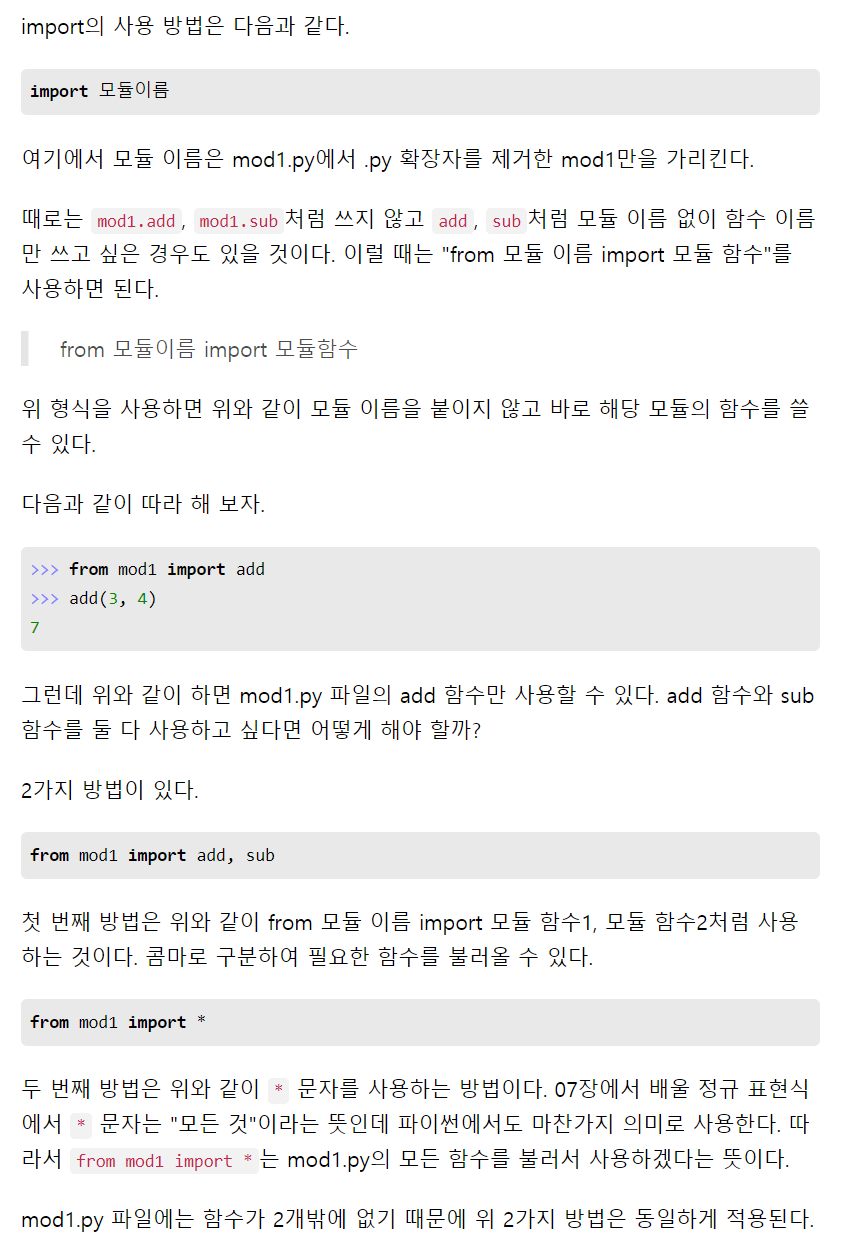

In [49]:
Image(r"C:\Users\is041\OneDrive\사진\스크린샷\화면 캡처 2021-07-13 151813.png")

# 파이썬 모듈
## Module : 함수, 변수, 클래스 등 파이썬 구성 요소 등을 모아놓은 파일

In [6]:
def add(x, y):
    return x + y

def subtract(x, y):
    return x - y

def multiply(x, y):
    return x * y

def divide(x , y):
    return x / y
    
def power(x, y):
    return x ** y
    
    
# print('-' * 15)
# print('called! inner!')
# print(add(5,5))
# print(subtract(15,5))
# print(multiply(5,5))
# print(divide(10,2))
# print(power(5,3))
# print('-' * 15)

# __name__ 사용
if __name__ == "__main__":
    print('-' * 15)
    print('called! __main__')
    print(add(5,5))
    print(subtract(15,5))
    print(multiply(5,5))
    print(divide(10,2))
    print(power(5,3))
    print('-' * 15)

---------------
called! __main__
10
10
25
5.0
125
---------------


# 파이썬 패키지
## 패키지 작성 및 사용법
* 파이썬은 패키지로 분할 된 개별적인 모듈로 구성
*  __init__.py : Python3.3 부터는 없어도 패키지로 인식 -> 단, 하위 호환을 위해 작성 추천
*  상대 경로 : ..(부모 디렉토리), .(현재 디렉토리) -> 모듈 내부에서만 사용

In [7]:
# 예제1
import sub.sub1.module1
import sub.sub2.module2

# 사용
sub.sub1.module1.mod1_test1()
sub.sub1.module1.mod1_test2()

# 사용
sub.sub2.module2.mod2_test1()
sub.sub2.module2.mod2_test2()

ModuleNotFoundError: No module named 'sub'

In [8]:
# 예제2
from sub.sub1 import module1
from sub.sub2 import module2 as m2 # Alias

# 사용
module1.mod1_test1()
module1.mod1_test2()

# 사용
m2.mod2_test1()
m2.mod2_test2()

ModuleNotFoundError: No module named 'sub'

In [ ]:
# 예제3
from sub.sub1 import *
from sub.sub2 import *

# 사용
module1.mod1_test1()
module1.mod1_test2()

# 사용
module2.mod2_test1()
module2.mod2_test2()